In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
train = pd.read_csv('../data/train_ajEneEa.csv')
test = pd.read_csv('../data/test_v2akXPA.csv')
sample_submission = pd.read_csv('../data/sample_submission_1.csv')
alldata = pd.concat([train,test])
alldata = alldata.sort_values(by='id').reset_index(drop=True)

## Inspect DataFrame

Inspecting the dtypes of columns, number of Missing Values, percentage of missing and Unique values in one dataframe

In [2]:
# Inspect train set
print ("Length of train rows:", len(train))
inspect_train = pd.DataFrame({'Dtype': train.dtypes, 'Unique values': train.nunique() ,
             'Number of Missing values': train.isnull().sum() ,
              'Percentage Missing': (train.isnull().sum() / len(train)) * 100
             }).sort_values(by='Number of Missing values',ascending = False)
inspect_train

Length of train rows: 43400


,Dtype,Number of Missing values,Percentage Missing,Unique values
smoking_status,object,13292,30.626728,3
bmi,float64,1462,3.368664,555
id,int64,0,0.000000,43400
gender,object,0,0.000000,3
age,float64,0,0.000000,104
hypertension,int64,0,0.000000,2
heart_disease,int64,0,0.000000,2
ever_married,object,0,0.000000,2
work_type,object,0,0.000000,5
Residence_type,object,0,0.000000,2


In [3]:
# Inspect test set
print ("Length of test rows:", len(test))
inspect_test = pd.DataFrame({'Dtype': test.dtypes, 'Unique values': test.nunique() ,
             'Number of Missing values': test.isnull().sum() ,
              'Percentage Missing': (test.isnull().sum() / len(test)) * 100
             }).sort_values(by='Number of Missing values',ascending = False)
inspect_test

Length of test rows: 18601


,Dtype,Number of Missing values,Percentage Missing,Unique values
smoking_status,object,5751,30.917693,3
bmi,float64,591,3.177249,500
id,int64,0,0.000000,18601
gender,object,0,0.000000,3
age,float64,0,0.000000,104
hypertension,int64,0,0.000000,2
heart_disease,int64,0,0.000000,2
ever_married,object,0,0.000000,2
work_type,object,0,0.000000,5
Residence_type,object,0,0.000000,2


In [4]:
# Inspect alldata set
print ("Length of alldata rows:", len(alldata))
inspect_alldata = pd.DataFrame({'Dtype': alldata.dtypes, 'Unique values': alldata.nunique() ,
             'Number of Missing values': alldata.isnull().sum() ,
              'Percentage Missing': (alldata.isnull().sum() / len(alldata)) * 100
             }).sort_values(by='Number of Missing values',ascending = False)
inspect_alldata

Length of alldata rows: 62001


,Dtype,Number of Missing values,Percentage Missing,Unique values
smoking_status,object,19043,30.714021,3
stroke,float64,18601,30.001129,2
bmi,float64,2053,3.311237,582
Residence_type,object,0,0.000000,2
age,float64,0,0.000000,104
avg_glucose_level,float64,0,0.000000,14143
ever_married,object,0,0.000000,2
gender,object,0,0.000000,3
heart_disease,int64,0,0.000000,2
hypertension,int64,0,0.000000,2


Now, lets see only the columns with missing values

In [5]:
inspect_alldata[inspect_alldata['Percentage Missing'] >0]

,Dtype,Number of Missing values,Percentage Missing,Unique values
smoking_status,object,19043,30.714021,3
stroke,float64,18601,30.001129,2
bmi,float64,2053,3.311237,582


Great. Note that **stroke** is our target variable. Obviosly it will have missing values in a concatanated dataframe.

## Age Distribution

Text(0.5,1,'Age Distribution')

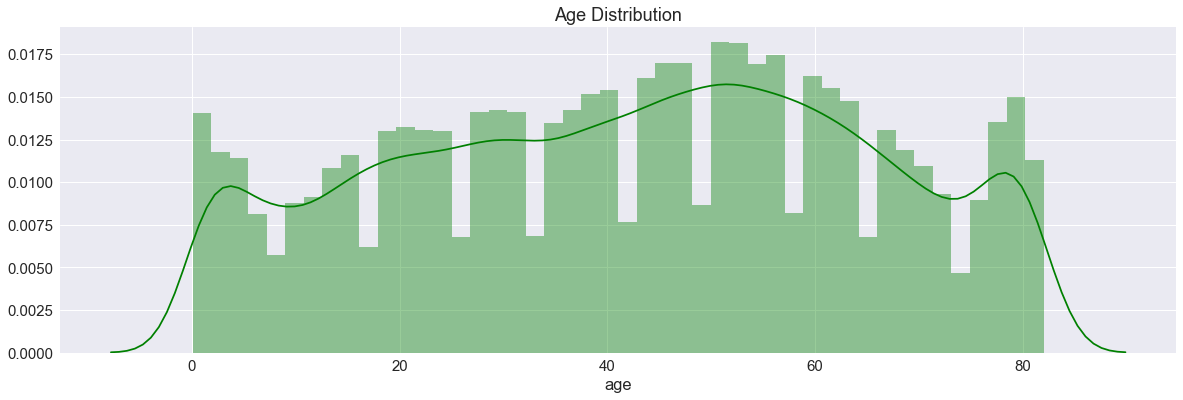

In [6]:
sns.set(font_scale=1.5)  # crazy big
plt.figure(figsize=(20,6))
sns.distplot(alldata['age'], color='g')
plt.title("Age Distribution")

Clearly we have data from all the age groups. Lets move on with checking **bmi** distributions of potential patients

## BMI Distribution

Text(0.5,1,'BMI')

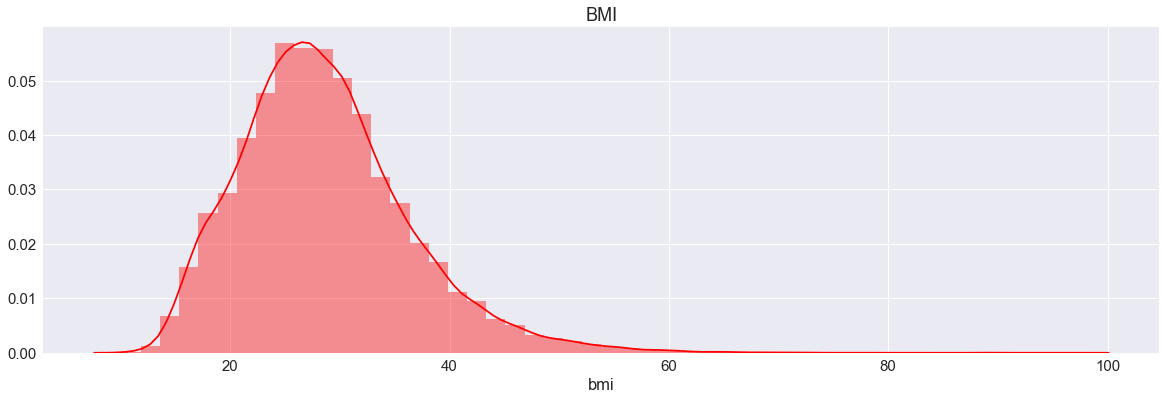

In [7]:
plt.figure(figsize=(20,6))
sns.distplot(alldata['bmi'].dropna(), color='r')
plt.title("BMI")

Hmm, the **BMI** over 25.0 is considered as overweight and above 30 is obese. Looks like our data has people who are overweighted. 

Notes to take: 
   1. Data can be used to add another feature of scaling weights
   2. Same can be used to confirm diabetic conditions

## Average Glucose Distribution

Text(0.5,1,'Gluclose levels')

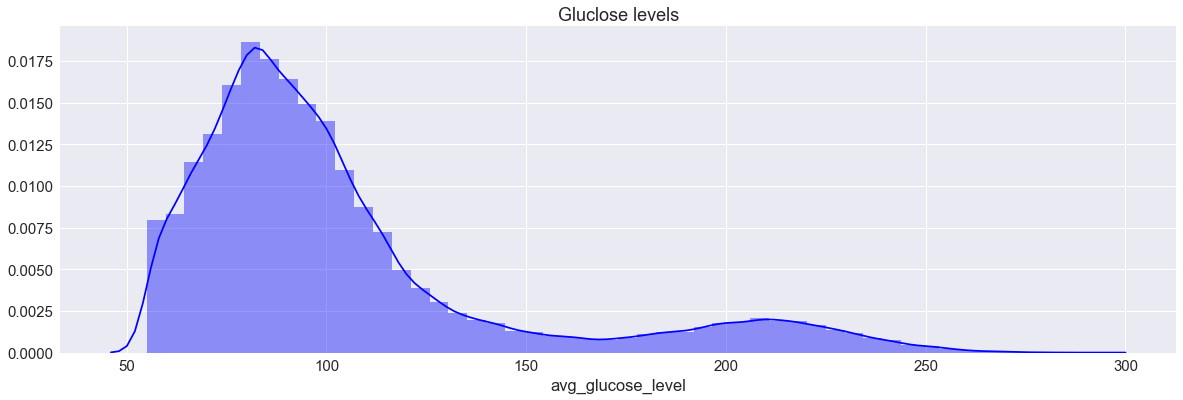

In [8]:
plt.figure(figsize=(20,6))
sns.distplot(alldata['avg_glucose_level'], color='b')
plt.title("Gluclose levels")

Seems A okay. But, there are potentially people with over 150mg level. That can be one of the indicator or perhaps a feature too.

In [9]:
num_cols = alldata._get_numeric_data().columns
cat_cols = alldata.select_dtypes(include='object').columns

## Catergoical Count Plots

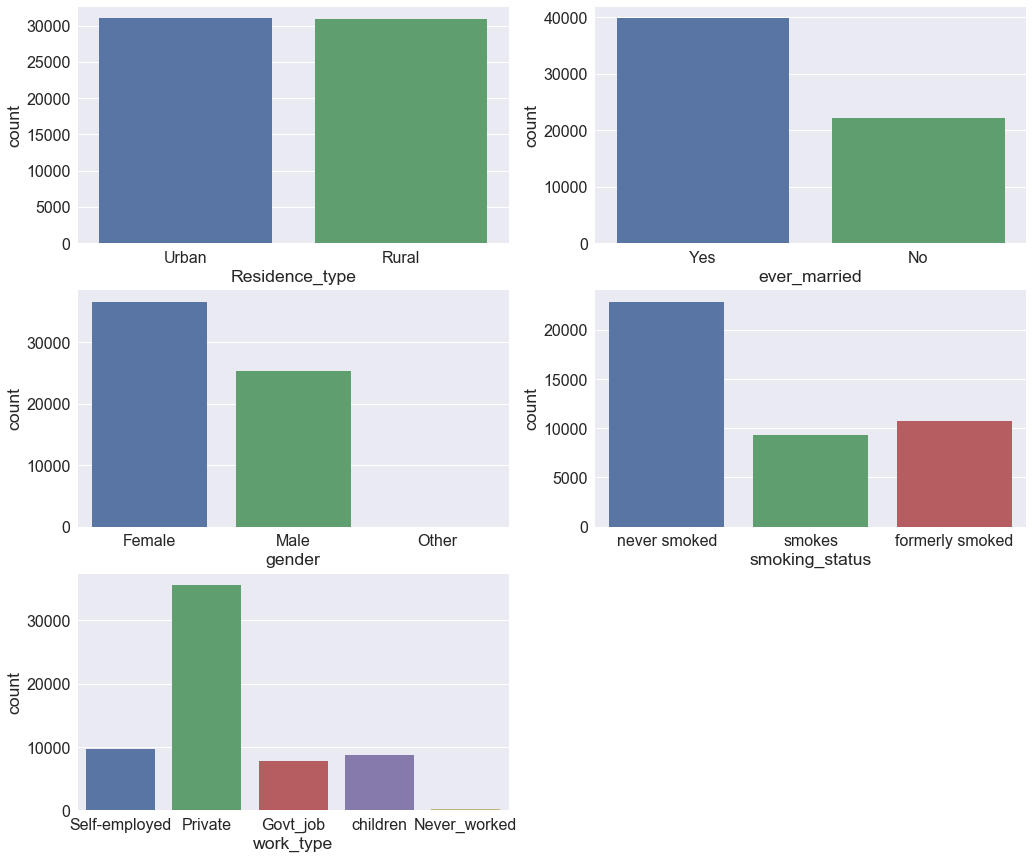

In [10]:
categorical_features_indices = np.where(alldata.dtypes != np.float)[0]
sns.set(font_scale=1.6)  # crazy big
plt.figure(figsize=(17,20))
for i, c in enumerate(cat_cols):
    ax = plt.subplot(4,2,i+1)
    sns.countplot(alldata[c])
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

Notes to take:

1. There is equal distribution of Urban and Rural areas. Nothing much in there. 
2. We are having some gain at **ever_married** which is obvious by our age plots as people marry around their twenties.
3. Woah, we are having a female dominance in the data. There are greater number of females here. 

Other distributions are drawn randomly. We aren't sure that if the data is correctly sampled. Let's dive into some feature engineering

## Feature Engineering

### Generation of Patient

Right now two important feature comes to me. First one, the intuition of strokes has all begun in late 1990s. There are numerous diseases which are common now but were rare before 30-40 years. So, lets extract the age data and make **generation** feature. This feature shall the model know three vital information: 
1. Age group of patient
2. How long he has been exposed to industrial age

<img src="https://assets.weforum.org/wp-content/uploads/2015/09/generation-identity-1024x768.png" width=600>

In [11]:
def Generation(age):
    if age <= 18:
        return "Kiddos"
    if  18 < age <= 34:
        return "Millennial"
    if 35 <= age <= 50:
        return "Gen-X"
    if 51 <= age <= 69:
        return "Boomer"
    if age >= 69:
        return "Silent"
    else:
        return age
alldata['generation'] = alldata['age'].apply(Generation)

### BMI scale

BMI has sufficient information to convey. Let's add the industry approved BMI scaling to our data with following inputs - 

-  BMI below 18.5  is considered underweight.
-  BMI of 18.5 to 24.9is considered healthy.
- BMI of 25 to 29.9  is considered overweight.
- BMI of 30 or higher is considered obese.

In [12]:
def ScaleBMI(bmi):
    if bmi <= 18.5:
        return "Under Weight"
    if 18.5 < bmi <= 24.9:
        return "Healthy"
    if 25 <= bmi < 29.9:
        return "Overweight"
    if bmi >= 29.9:
        return "Obese"
    else:
        return bmi
alldata['bmi_scale'] = alldata['bmi'].apply(ScaleBMI)

## Is Diabetic

Determine if the patient is diabetic using the following table
![img](https://www.thediabetescouncil.com/wp-content/uploads/2017/08/blood-sugar-levels-target-range-table.jpg)

In [13]:
def IsDiabetic(glucose):
    if glucose > 140:
        return 1
    else:
        return 0
alldata['diabetic'] = alldata['avg_glucose_level'].apply(IsDiabetic)

In [14]:
alldata.head()

,Residence_type,age,avg_glucose_level,bmi,ever_married,gender,heart_disease,hypertension,id,smoking_status,stroke,work_type,generation,bmi_scale,diabetic
0,Urban,80.0,67.45,25.6,Yes,Female,1,0,1,never smoked,0.0,Self-employed,Silent,Overweight,0
1,Urban,55.0,105.11,27.8,Yes,Female,0,0,2,NaN,NaN,Private,Boomer,Overweight,0
2,Urban,27.0,84.91,NaN,Yes,Male,0,0,3,never smoked,NaN,Private,Millennial,NaN,0
3,Rural,37.0,82.15,24.3,Yes,Female,0,0,4,smokes,0.0,Private,Gen-X,Healthy,0
4,Rural,78.0,99.26,22.6,Yes,Male,1,1,5,smokes,NaN,Self-employed,Silent,Healthy,0


## Means which add the mean
Let's group by with python code and extract mean of  various continous variables. Also, it can come in handy to fill them if there are any NaNs in current or future datasets

In [24]:
for val in alldata['work_type'].unique():
    print ("\nFor Work Type", val)
    print ('='*30)
    mean_age  = alldata[alldata['work_type']==str(val)]['age'].mean()
    avg_gluco = alldata[alldata['work_type']==str(val)]['avg_glucose_level'].mean()
    mean_bmi = alldata[alldata['work_type']==str(val)]['bmi'].mean()
    print ("Mean Age is: {}".format(mean_age))
    print ("Mean Gluco is: {}".format(avg_gluco))
    print ("Mean BMI is: {}".format(mean_bmi))



For Work Type Self-employed
Mean Age is: 59.37000207168013
Mean Gluco is: 112.49599544230307
Mean BMI is: 30.119715557485552

For Work Type Private
Mean Age is: 44.923561151079134
Mean Gluco is: 104.76230272032306
Mean BMI is: 29.96339895890875

For Work Type Govt_job
Mean Age is: 49.05644536295531
Mean Gluco is: 106.717354688711
Mean BMI is: 30.538875469672618

For Work Type children
Mean Age is: 6.6649150416239475
Mean Gluco is: 92.6375949367091
Mean BMI is: 19.872499132647224

For Work Type Never_worked
Mean Age is: 18.22222222222222
Mean Gluco is: 94.44075396825396
Mean BMI is: 26.064143426294816


In [25]:
for val in alldata['smoking_status'].unique():
    print ("\nFor Work Type", val)
    print ('='*30)
    mean_age  = alldata[alldata['smoking_status']==str(val)]['age'].mean()
    avg_gluco = alldata[alldata['smoking_status']==str(val)]['avg_glucose_level'].mean()
    mean_bmi = alldata[alldata['smoking_status']==str(val)]['bmi'].mean()
    print ("Mean Age is: {}".format(mean_age))
    print ("Mean Gluco is: {}".format(avg_gluco))
    print ("Mean BMI is: {}".format(mean_bmi))



For Work Type never smoked
Mean Age is: 45.512453028052086
Mean Gluco is: 105.11148868303826
Mean BMI is: 29.82573882855629

For Work Type nan
Mean Age is: nan
Mean Gluco is: nan
Mean BMI is: nan

For Work Type smokes
Mean Age is: 46.40412061379976
Mean Gluco is: 107.18996458847491
Mean BMI is: 29.894405515370675

For Work Type formerly smoked
Mean Age is: 54.292197526271735
Mean Gluco is: 111.74965683995147
Mean BMI is: 30.731456921112066


In [26]:
for val in alldata['generation'].unique():
    print ("\nFor Gen Type", val)
    print ('='*30)
    mean_age  = alldata[alldata['generation']==str(val)]['age'].mean()
    avg_gluco = alldata[alldata['generation']==str(val)]['avg_glucose_level'].mean()
    mean_bmi = alldata[alldata['generation']==str(val)]['bmi'].mean()
    print ("Mean Age is: {}".format(mean_age))
    print ("Mean Gluco is: {}".format(avg_gluco))
    print ("Mean BMI is: {}".format(mean_bmi))



For Gen Type Silent
Mean Age is: 76.40380835380836
Mean Gluco is: 120.7691584766579
Mean BMI is: 28.9806472746331

For Gen Type Boomer
Mean Age is: 59.29981059448891
Mean Gluco is: 114.2943123357973
Mean BMI is: 31.328587918430134

For Gen Type Millennial
Mean Age is: 26.64037933616172
Mean Gluco is: 94.9265568588302
Mean BMI is: 28.867832880434687

For Gen Type Gen-X
Mean Age is: 42.86856611067363
Mean Gluco is: 101.32077242465427
Mean BMI is: 31.06471539932338

For Gen Type Kiddos
Mean Age is: 8.952333101529996
Mean Gluco is: 92.66898904728792
Mean BMI is: 21.294985900599247


# Stroke Positive Patients

My condolences to the patients and families. Conditions like this are unfortunate and god willing protect us from such conditions. That said, we could help the potential patients getting the right treatment by predicting things in advance. Glad that we can do this now with data science. Let's put these brains for a good cause

Seperating the postive stroke patients to understand the conditions and features

In [27]:
patients  = alldata[alldata['stroke']==1]

In [28]:
patients.head()

,Residence_type,age,avg_glucose_level,bmi,ever_married,gender,heart_disease,hypertension,id,smoking_status,stroke,work_type,generation,bmi_scale,diabetic
65,Urban,79.0,87.06,24.3,Yes,Male,0,0,80,formerly smoked,1.0,Self-employed,Silent,Healthy,0
177,Rural,81.0,91.54,31.4,Yes,Male,0,0,210,never smoked,1.0,Self-employed,Silent,Obese,0
421,Urban,74.0,74.96,26.6,Yes,Female,0,0,491,never smoked,1.0,Self-employed,Silent,Overweight,0
494,Rural,68.0,217.50,24.5,No,Male,1,0,573,formerly smoked,1.0,Self-employed,Boomer,Healthy,1
610,Rural,82.0,84.03,26.5,No,Female,1,1,712,formerly smoked,1.0,Private,Silent,Overweight,0


### Smoking status of +'ve patients

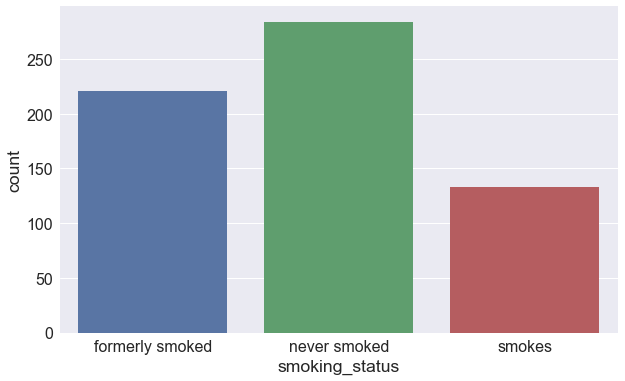

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(patients['smoking_status'])

Its shocking to see thta non smokers have the stroke impact too. Its kind of safe to say that smoking might lead to various deadly conditions like cancer, mutation and stuff but in context of our data we can't conclude a smoker - stroke potential patient.

### BMI_scale of +'ve patients

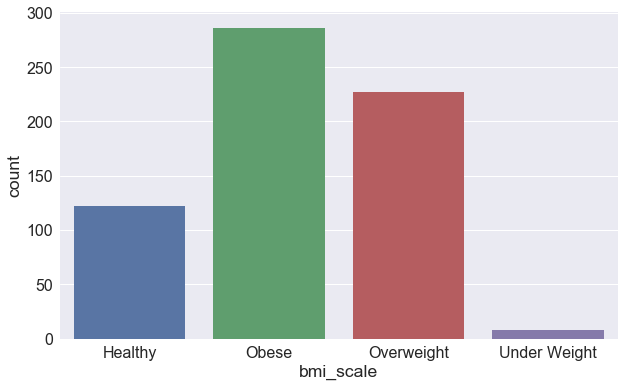

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(patients['bmi_scale'])

This is quite obvious. Patients who are on unhealthy diet might have high BP and eventually be stroke +'ve

## Work_type of +'ve patients

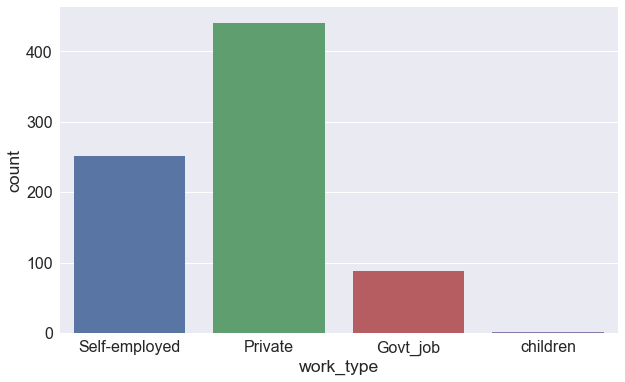

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(patients['work_type'])

Don't let this plot confuse away. In real there are heavy private jobs than compared to Govt or being self employed. Nothing to take much from here.

## Residence_type of +'ve patients

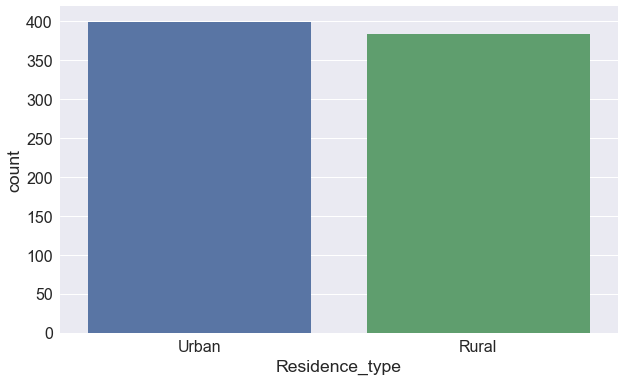

In [65]:
plt.figure(figsize=(10,6))
sns.countplot(patients['Residence_type'])

Just one thing to say. The data from both categories are equally covered. No imbalance data here.

## Generation of +'ve patients

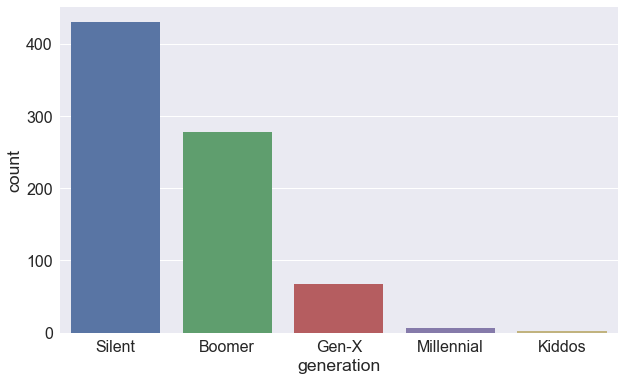

In [66]:
plt.figure(figsize=(10,6))
sns.countplot(patients['generation'])

Its interesting to see the Silent Generation is high on numbers here. The age and the total weiring out of the body is sure a significant feature for stroke +'ve.

## Heart Disease? Or Hyper tension are the factors?

Text(0.5,1,'Heart Disease')

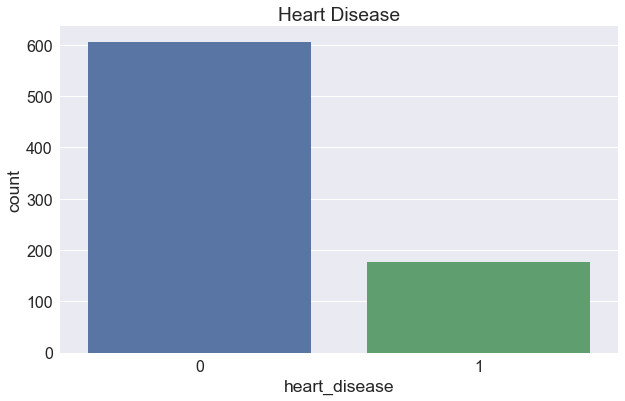

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(patients['heart_disease'])
plt.title("Heart Disease")

Text(0.5,1,'Hyper tension')

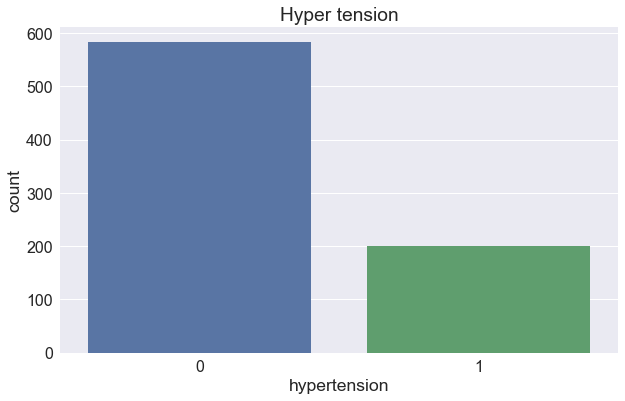

In [39]:
plt.figure(figsize=(10,6))
sns.countplot(patients['hypertension'])
plt.title("Hyper tension")

## Age dist of +'ve patients

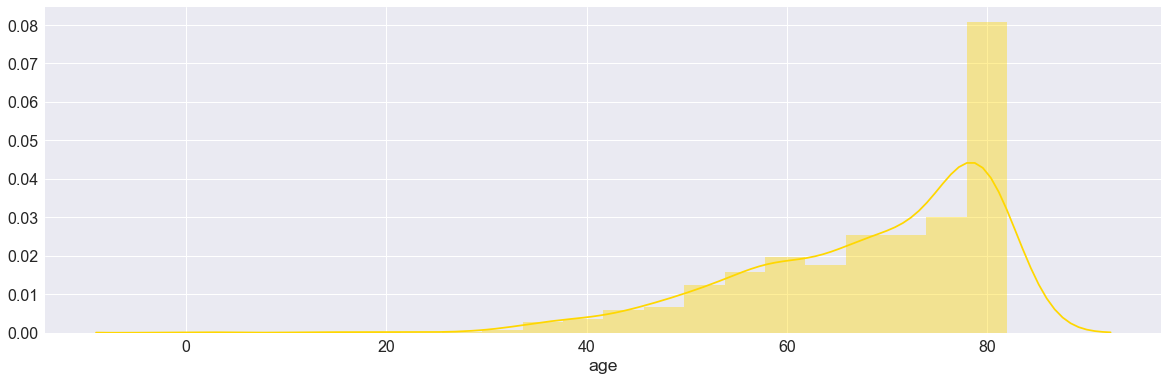

In [67]:
plt.figure(figsize=(20,6))
sns.distplot(patients['age'], color='gold')

Again, the same is proved by the Age distribution plot.

## Avg_glucose_level dist of +'ve patients

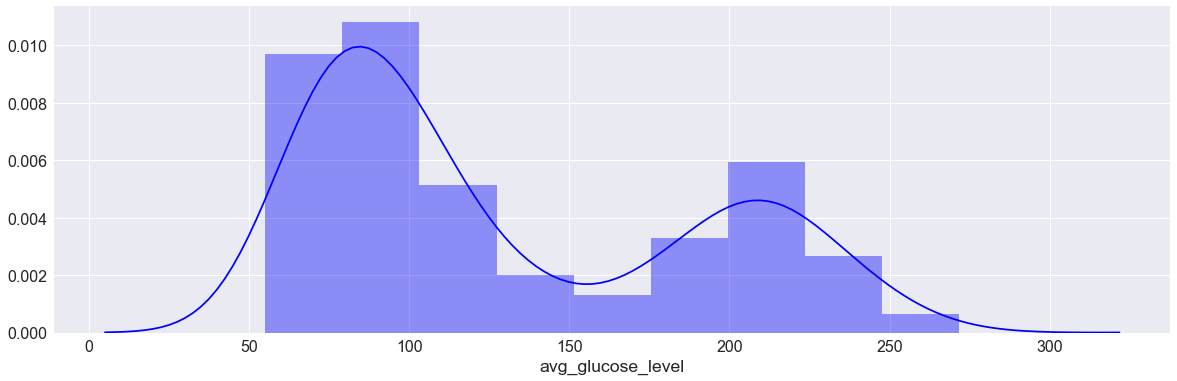

In [68]:
plt.figure(figsize=(20,6))
sns.distplot(patients['avg_glucose_level'], color='blue')

They seems to mimic the universal distributions

In [32]:
patients

,Residence_type,age,avg_glucose_level,bmi,ever_married,gender,heart_disease,hypertension,id,smoking_status,stroke,work_type,generation,bmi_scale,diabetic
65,Urban,79.0,87.06,24.3,Yes,Male,0,0,80,formerly smoked,1.0,Self-employed,Silent,Healthy,0
177,Rural,81.0,91.54,31.4,Yes,Male,0,0,210,never smoked,1.0,Self-employed,Silent,Obese,0
421,Urban,74.0,74.96,26.6,Yes,Female,0,0,491,never smoked,1.0,Self-employed,Silent,Overweight,0
494,Rural,68.0,217.50,24.5,No,Male,1,0,573,formerly smoked,1.0,Self-employed,Boomer,Healthy,1
610,Rural,82.0,84.03,26.5,No,Female,1,1,712,formerly smoked,1.0,Private,Silent,Overweight,0
612,Rural,70.0,68.64,NaN,Yes,Female,0,0,714,NaN,1.0,Private,Silent,NaN,0
615,Urban,61.0,210.08,32.3,Yes,Male,0,0,717,formerly smoked,1.0,Govt_job,Boomer,Obese,1
747,Urban,79.0,99.35,NaN,Yes,Male,0,0,869,NaN,1.0,Private,Silent,NaN,0
788,Rural,78.0,85.37,24.2,Yes,Female,0,1,919,never smoked,1.0,Self-employed,Silent,Healthy,0
833,Urban,53.0,125.56,NaN,Yes,Male,0,0,972,NaN,1.0,Self-employed,Boomer,NaN,0
